In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
def norm2(x):
    return torch.sqrt(torch.sum(x**2))


def f(x, A, b):
    return 0.5 * norm2(A @ x - b)


def gradient(x, A, b):
    return A.T @ (A @ x - b)


def stop_crit(crit, x_next, x_before, x0, A, b, epsilon):
    if crit == "argument":
        return norm2(x_next - x_before) > epsilon
    elif crit == "function":
        return torch.abs(f(x_next, A, b) - f(x_before, A, b)) > epsilon
        
        
def grad_des(x0, crit, A, b, lr = 0.02, epsilon = 0.001):
    x_next = x0.clone()
    x_before = None
    y_hist = [f(x_next, A, b)]
    k = 0
    while x_before is None or stop_crit(crit, x_next, x_before, x0, A, b, epsilon):
        x_before = x_next.clone()
        x_next = x_next - lr * gradient(x_next, A, b)
        x_next[x_next > 1] = 1
        x_next[x_next < 0] = 0
        y_hist.append(f(x_next, A, b))
        k += 1
        lr = lr / (k + 1) ** (1 / 2)
    
    return y_hist, k

In [3]:
n = 3
m = 2

A = 4*torch.rand((m, n))

b = 4*torch.rand((m, 1))

x0 = 3*torch.rand((n,1))

In [4]:
y_arg, k_arg = grad_des(x0, "argument", A, b)
y_fun, k_fun = grad_des(x0, "function", A, b)

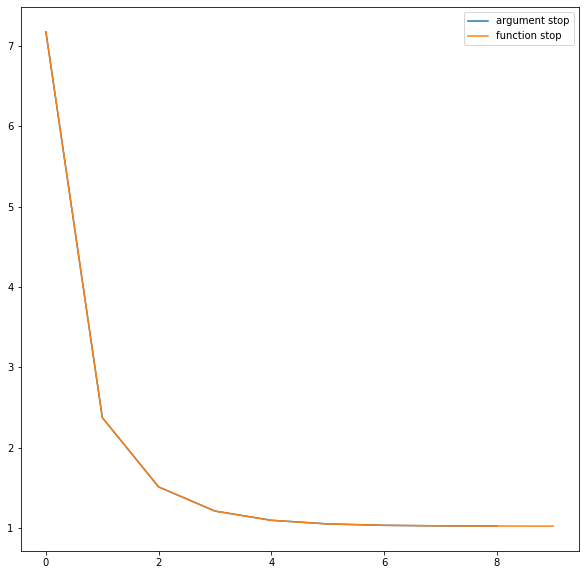

In [5]:
plt.figure(figsize=(10, 10))

plt.plot(y_arg, label="argument stop")
plt.plot(y_fun, label="function stop")

plt.legend()

plt.show()